# Name: Shaban Ali from Punjab, Narowal
Email: shabanyounas12@gmail.com
Ph# and Whatsapp 03416376316

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
data=pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [56]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<AxesSubplot:>

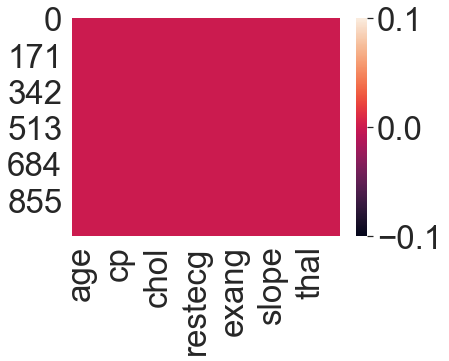

In [57]:
sns.heatmap(data.isnull())

<AxesSubplot:xlabel='age', ylabel='count'>

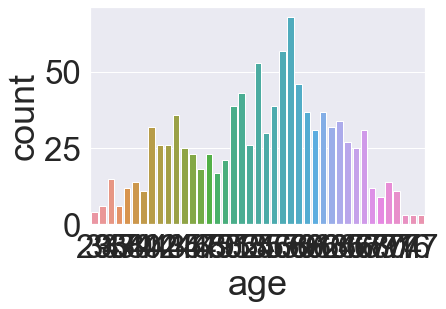

In [58]:
sns.countplot(x='age',data=data)

In [59]:
data.shape

(1025, 14)

In [60]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

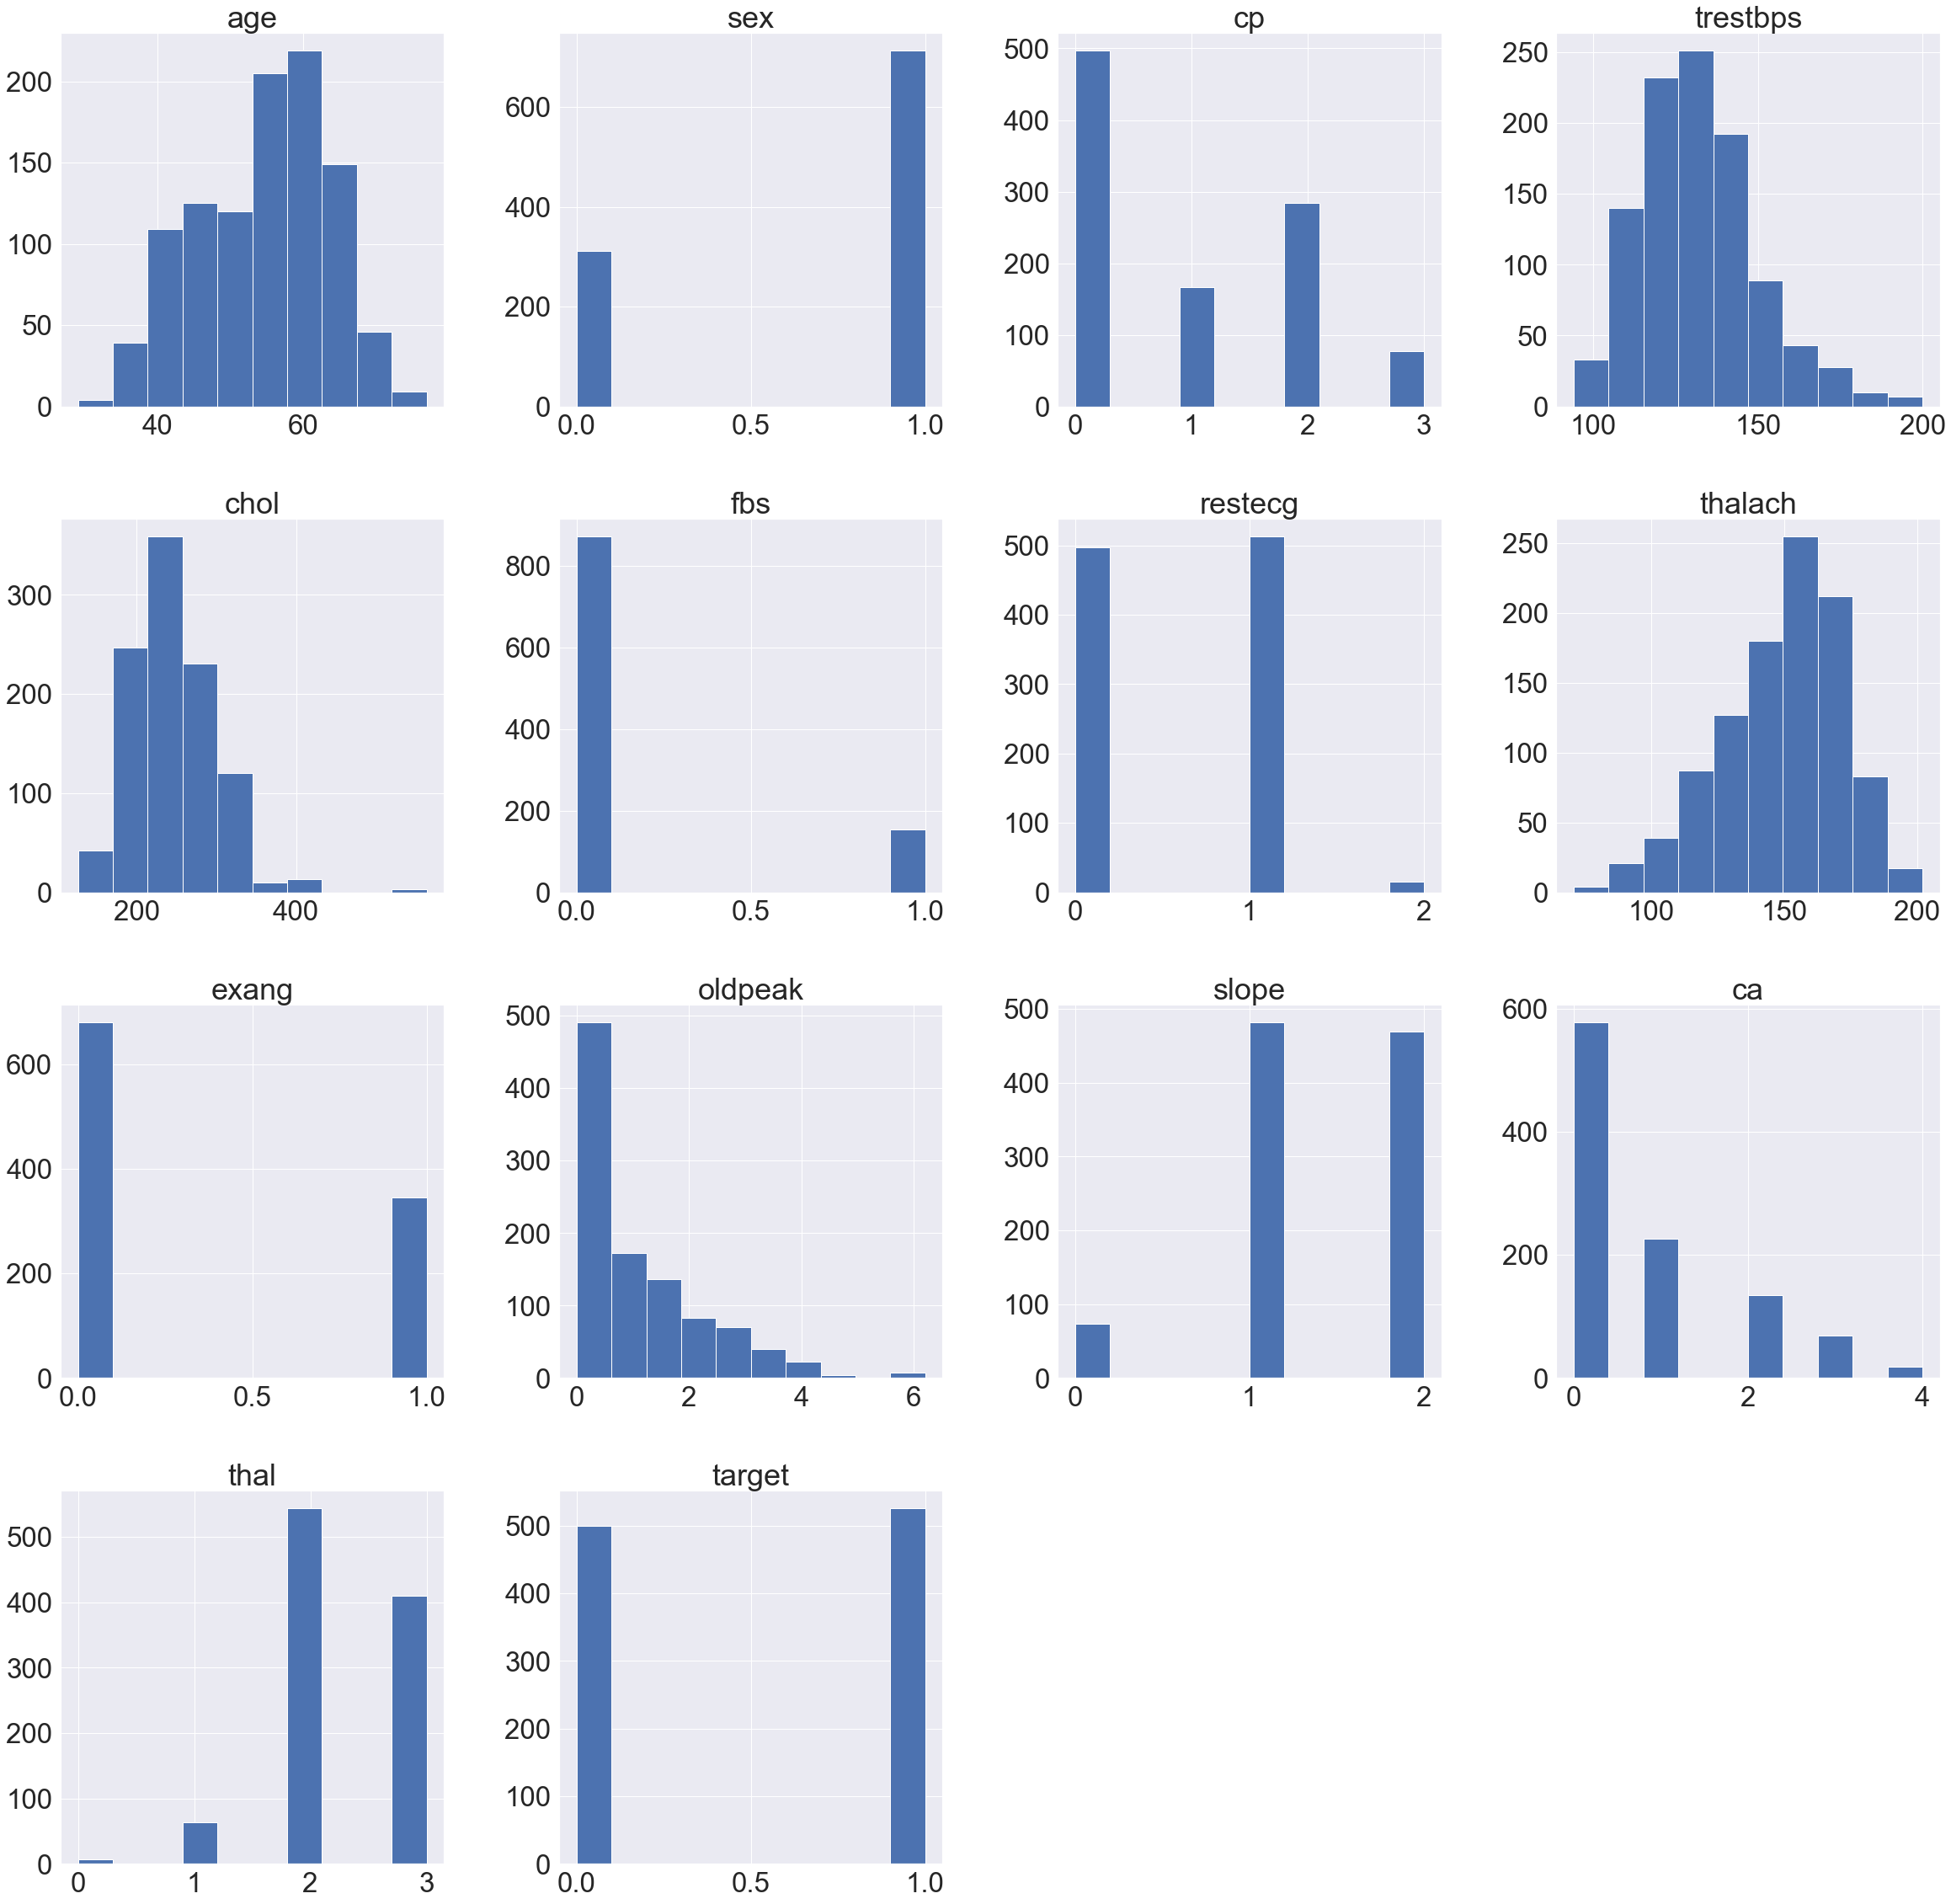

In [61]:
sns.set(font_scale=3) #zoom fonts of data
data.hist(figsize=(40,40))
plt.show()

In [62]:
data['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

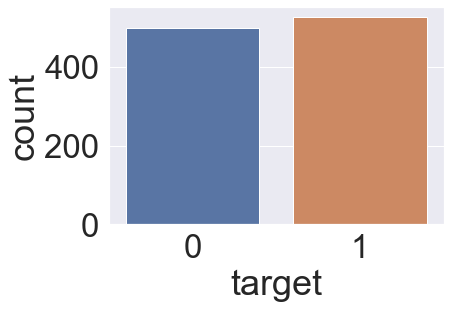

In [63]:
sns.countplot(x='target', data=data)

In [64]:
data.groupby('age')['target'].value_counts()

age  target
29   1          4
34   1          6
35   1          8
     0          7
37   1          6
               ..
70   1          3
71   1         11
74   1          3
76   1          3
77   0          3
Name: target, Length: 75, dtype: int64

<AxesSubplot:xlabel='age', ylabel='count'>

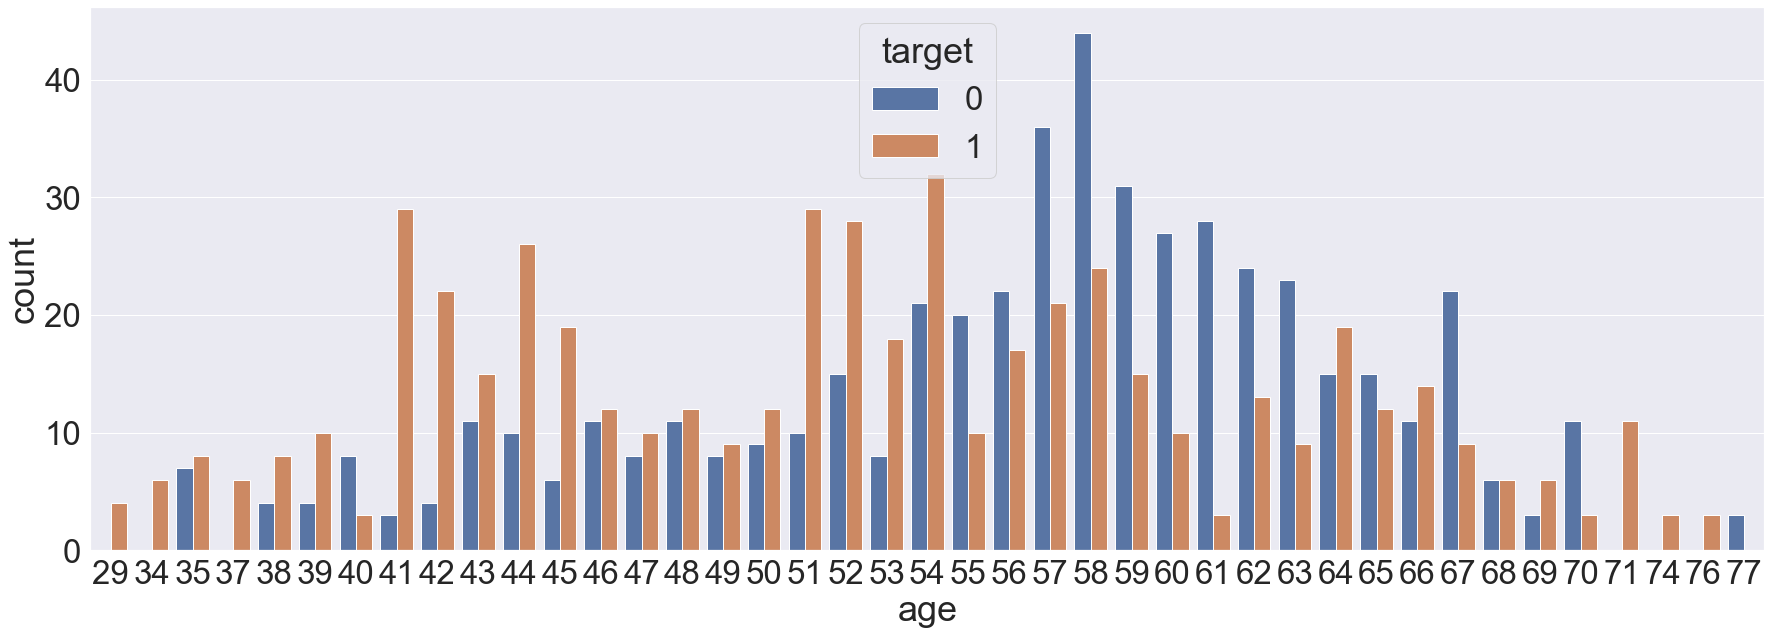

In [65]:
plt.figure(figsize=(30,10))
sns.countplot(x='age',hue='target', data=data)

In [66]:
data[data['age']==54].value_counts()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
54   1    0   110       206   0    0        108      1      0.0      1      1   2     0         4
                        239   0    1        126      1      2.8      1      1   3     0         4
              122       286   0    0        116      1      3.2      1      2   2     0         4
          1   108       309   0    1        156      0      0.0      2      0   3     1         4
          2   120       258   0    0        147      0      0.4      1      0   3     1         4
     0    1   132       288   1    0        159      1      0.0      2      1   2     1         3
          2   108       267   0    0        167      0      0.0      2      0   2     1         3
              110       214   0    1        158      0      1.6      1      0   2     1         3
              135       304   1    1        170      0      0.0      2      0   2     1         3
              160       2

In [67]:
#sns.countplot(x=[data['age']==54], hue='target', data=data) # plot only aged 54 people

Machine Learning Algorithms

In [68]:
x= data.drop('target', axis=1)
y= data['target']

In [69]:
print(x.shape)
print(y.shape)
#sns.countplot(['x','y']) #work-well

(1025, 13)
(1025,)


In [70]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [71]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=5)

In [72]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(820, 13)
(205, 13)
(820,)
(205,)


# Logistic Regression Model

C:\Users\8470\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ValueError: x and y must have same first dimension, but have shapes (19,) and (20,)

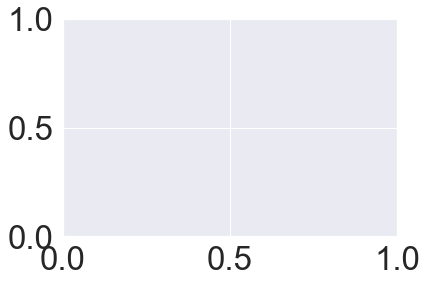

In [73]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
scores.append(metrics.accuracy_score(y_test, y_pred))    
plt.plot(k_range,scores)
plt.xlabel('value of k for lr')
plt.ylabel('accuracy scores')
plt.show()

In [74]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
acc=metrics.accuracy_score(y_test, y_pred)*100
print(f"Accuracy score is {acc}")

Accuracy score is 84.39024390243902


C:\Users\8470\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# KNN Model

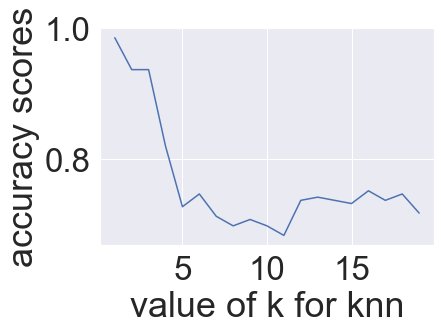

In [75]:
k_range=list(range(1,20))
scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))    
plt.plot(k_range,scores)
plt.xlabel('value of k for knn')
plt.ylabel('accuracy scores')
plt.show()

In [76]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
acc=metrics.accuracy_score(y_test, y_pred)*100
print(f"Accuracy score is {acc}")

Accuracy score is 70.73170731707317


# Decison Tree Classifier Model

In [77]:
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
y_pred=DT.predict(x_test)
acc=metrics.accuracy_score(y_test, y_pred)*100
print(f"Accuracy score is {acc}")
print(f"ALLAHAMDOLILLAH, DONE IT")

Accuracy score is 98.53658536585365
ALLAHAMDOLILLAH, DONE IT


# Confusion Matrix Displayed in the Heat Map

In [78]:
from sklearn.metrics import confusion_matrix

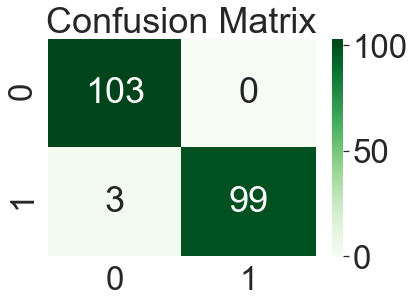

In [79]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,cmap="Greens", annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()